## Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import sample
import shutil
from zipfile import ZipFile 
import warnings

warnings.filterwarnings("ignore")

## Visualizing direction of maximum variance

#### 1. First we generate a set of points inside an ellipse

In [2]:
def generatePointsOnEllipse(maj_axis,min_axis,centre,tilt,pointNum):
    
    u_x = centre[0]  ## X_co-ordinate of the centre
    u_y = centre[1]  ## Y_co-ordinate of the centre
    
    tilt_rad = tilt*np.pi/180 ## Convert the angle of the centre in radians
    
    rot_matrix = np.array([[np.cos(tilt_rad), np.sin(tilt_rad)]
                          ,[-np.sin(tilt_rad), np.cos(tilt_rad)]])
    
    gen_Points = 0 ## number of points generated inside the ellipse so far
    
    a = maj_axis/2 ## semi-major axis
    b = min_axis/2 ## semi-minor axis
    
    internal_points = []
    while(gen_Points<pointNum):
        x = np.random.uniform(-a,a)
        y = np.random.uniform(-b,b)
        if((x/a)**2+(y/b)**2 < 1):
            internal_points.append([x,y])
            gen_Points +=1
            
    internal_points = np.matrix(internal_points)  ##Convert the list of points to a matrix
    internal_points = internal_points@rot_matrix  ##Rotate the matrix by the angle 'tilt_rad'
    
    x_val = np.ravel(internal_points[:, 0]) ## Convert the 1-D matrix to a 1-D array using np.ravel
    y_val = np.ravel(internal_points[:,1])  ## Convert the 1-D matrix to a 1-D array using np.ravel
    
    x_val = x_val + u_x   ## Shift the centre of the ellipse to [u_x, u_y]
    y_val = y_val + u_y   ## Shift the centre of the ellipse to [u_x, u_y]
    plt.scatter(x_val, y_val)
    return(x_val,y_val)

#### 2. Then we visualize our set of points

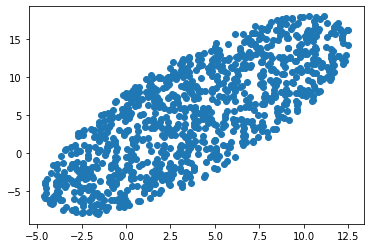

In [3]:
x_val, y_val = generatePointsOnEllipse(30,10,[4,5],60,1000)

#### 3.we calculate the eigen-vectors of the covariance matrix of these set of points

In [4]:
data_mat = np.stack((x_val, y_val)) ## np.stack is used tostack multiple 1-d arrays
print(data_mat)

cov_mat = np.cov(data_mat) ## Obtain the covariance matrix of the data vector
eig_val, eig_vec = np.linalg.eig(cov_mat) ## Find the eigen vectors and the corresponding eigen values of the matrix

print("Eigen values for this dataset is {}".format(eig_val))  ## Print these eigen values
print("Corresponding eigen-vectors are {}".format(eig_vec)) 

eig_1 = eig_vec[:,0]
eig_2 = eig_vec[:,1]

data_mean = np.mean(data_mat, axis=1) ## Compute the row_wise mean for this dataset
data_shift = data_mat - np.matrix(data_mean).T

[[ 4.03631885 -3.10143082  7.25906394 ... -2.10734925 10.65185774
   3.60675586]
 [12.88362879 -0.09240832  6.42755837 ... -7.79264052 13.94030859
   8.09831351]]
Eigen values for this dataset is [ 6.31774986 58.76325331]
Corresponding eigen-vectors are [[-0.86335665 -0.50459419]
 [ 0.50459419 -0.86335665]]


#### 4. Project the set of points along the direction of eigen vectors and calculate the variances of these projected points

In [5]:
eig_1_mat = np.matrix(eig_1)
proj_points_1 = eig_1_mat@data_shift
print("Variance of the projected points along 1st eigen vector is {}".format(np.var(proj_points_1)))

eig_2_mat = np.matrix(eig_2)
proj_points_2 = eig_2_mat@data_shift
print("Variance of the projected points along 2nd eigen vector is {}".format(np.var(proj_points_2)))

Variance of the projected points along 1st eigen vector is 6.311432113660113
Variance of the projected points along 2nd eigen vector is 58.70449005343234


#### 5. Project these points along any randon direction  and compare the variance along this direction with those along the given eigen vectors

In [6]:
random_vec = np.random.uniform(-1,1,size=(1,2))
unit_vec = random_vec/np.linalg.norm(random_vec)
#print("length of unit_vec is {}".format(np.linalg.norm(unit_vec))) ## Length of unit_vec

proj_points_rand = unit_vec@data_shift
print("Variance of projected points along random unit vector is {}".format(np.var(proj_points_rand)))

Variance of projected points along random unit vector is 48.438887057915565


## PCA on Yale Faces Dataset

#### 1. Extract the zip file to obtain the folder

In [17]:
my_dir = os.getcwd() ## my_dir is my current working folder
zip_folder = os.path.join(my_dir,"yalefaces.zip")
print("Path to the zipped folder is {}".format(zip_folder))
with ZipFile(zip_folder, 'r') as zip: 
    zip.extractall()

Path to the zipped folder is C:\Users\Arsalan\yalefaces.zip


#### 2. display some images from the dataset

['Readme.txt', 'subject01.gif', 'subject01.glasses', 'subject01.glasses.gif', 'subject01.happy', 'subject01.leftlight', 'subject01.noglasses', 'subject01.normal', 'subject01.rightlight', 'subject01.sad', 'subject01.sleepy', 'subject01.surprised', 'subject01.wink', 'subject02.centerlight', 'subject02.glasses', 'subject02.happy', 'subject02.leftlight', 'subject02.noglasses', 'subject02.normal', 'subject02.rightlight', 'subject02.sad', 'subject02.sleepy', 'subject02.surprised', 'subject02.wink', 'subject03.centerlight', 'subject03.glasses', 'subject03.happy', 'subject03.leftlight', 'subject03.noglasses', 'subject03.normal', 'subject03.rightlight', 'subject03.sad', 'subject03.sleepy', 'subject03.surprised', 'subject03.wink', 'subject04.centerlight', 'subject04.glasses', 'subject04.happy', 'subject04.leftlight', 'subject04.noglasses', 'subject04.normal', 'subject04.rightlight', 'subject04.sad', 'subject04.sleepy', 'subject04.surprised', 'subject04.wink', 'subject05.centerlight', 'subject05.

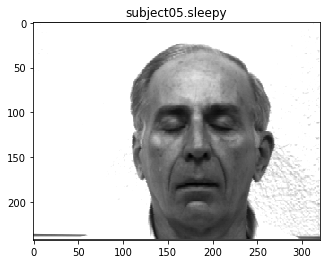

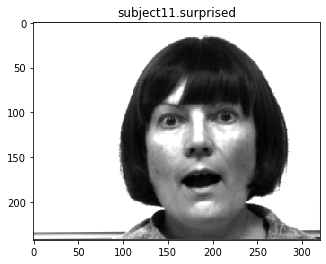

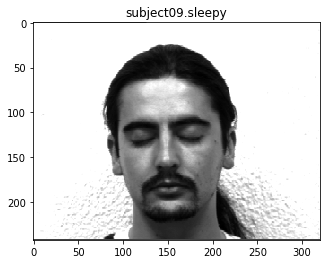

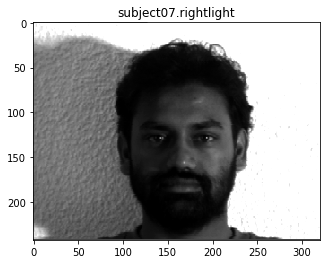

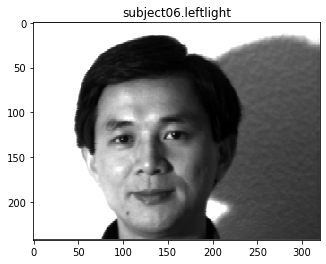

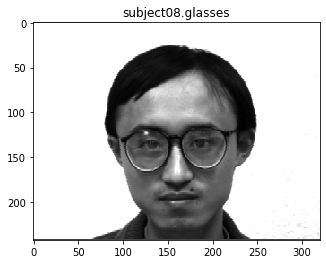

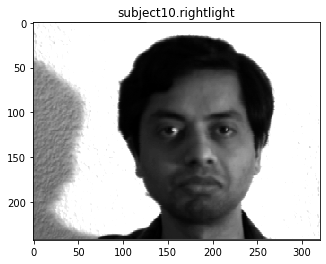

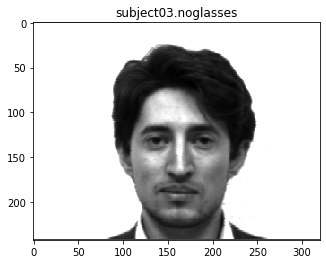

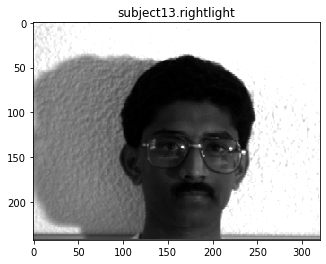

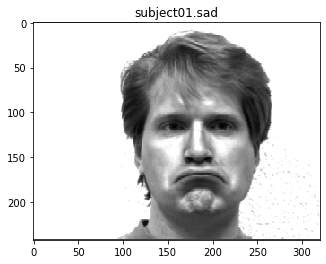

In [35]:
data_folder = os.path.join(my_dir,"yalefaces")
file_list = os.listdir(data_folder)
print(file_list)
sample_images = sample(file_list,10) ## Sample 10 images from the dataset
for img_name in sample_images:
    image_path = os.path.join(data_folder,img_name)
    image = mpimg.imread(image_path)
    plt.imshow(image,cmap="gray")
    plt.title(img_name)
    plt.show()

#### 3. divide the dataset into training and testing sets

In [20]:
train_folder_path = os.path.join(my_dir,"Faces_Train")
test_folder_path = os.path.join(my_dir,"Faces_Test")

## Delete the folders if they exist already
if os.path.exists(train_folder_path):
    shutil.rmtree(train_folder_path)

if os.path.exists(test_folder_path):
    shutil.rmtree(test_folder_path)

os.mkdir(train_folder_path)  ## Creates a new directory
os.mkdir(test_folder_path) ## Creates a new directory

idx_list = [str(i).zfill(2) for i in range(1,16,1)] ##Creates numbers with leading zeros(i.e. 01 instead of 1, 02 instaed of 2 etc.)
print(idx_list)

file_name_list = [[] for i in range(15)]

for i in range(len(idx_list)):
    for fname in file_list:
        if fname.startswith("subject"+idx_list[i]):
            file_name_list[i].append(os.path.join(data_folder,fname))

print(file_name_list)

for i in range(len(idx_list)):
    ls = file_name_list[i]  ## Finds a list within the 'file_name_list',which contains the paths to images of a particular subject
    
    ## Since a single list contains paths to the images of a particular subject and each subject has 11 images, we will randomly choose an index between 0 and 11
    test_idx = np.random.choice(11)  
    test_file = ls[test_idx]
    shutil.copy(test_file,test_folder_path)
    
    ls.remove(ls[test_idx])
    
    for train_file in ls:
        shutil.copy(train_file,train_folder_path)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
[['C:\\Users\\Arsalan\\yalefaces\\subject01.gif', 'C:\\Users\\Arsalan\\yalefaces\\subject01.glasses', 'C:\\Users\\Arsalan\\yalefaces\\subject01.glasses.gif', 'C:\\Users\\Arsalan\\yalefaces\\subject01.happy', 'C:\\Users\\Arsalan\\yalefaces\\subject01.leftlight', 'C:\\Users\\Arsalan\\yalefaces\\subject01.noglasses', 'C:\\Users\\Arsalan\\yalefaces\\subject01.normal', 'C:\\Users\\Arsalan\\yalefaces\\subject01.rightlight', 'C:\\Users\\Arsalan\\yalefaces\\subject01.sad', 'C:\\Users\\Arsalan\\yalefaces\\subject01.sleepy', 'C:\\Users\\Arsalan\\yalefaces\\subject01.surprised', 'C:\\Users\\Arsalan\\yalefaces\\subject01.wink'], ['C:\\Users\\Arsalan\\yalefaces\\subject02.centerlight', 'C:\\Users\\Arsalan\\yalefaces\\subject02.glasses', 'C:\\Users\\Arsalan\\yalefaces\\subject02.happy', 'C:\\Users\\Arsalan\\yalefaces\\subject02.leftlight', 'C:\\Users\\Arsalan\\yalefaces\\subject02.noglasses', 'C:\\Users\\Arsal

#### 4. Find eigen vectors

In [37]:
train_files_list = os.listdir(train_folder_path)
#print(train_files_list)
train_ls = []
for file in train_files_list:
    img_file = os.path.join(train_folder_path,file)
    arr = mpimg.imread(img_file)
    #print(arr.shape)
    arr = arr.reshape(1,arr.shape[0]*arr.shape[1]) ## Convert to a 1D matrix
    train_ls.append(np.ravel(arr)) ## Before appending, convert the 1D martix to a 1d array using np.ravel 
    train_mat = np.matrix(train_ls)
print(train_mat.shape)
mean_img = np.mean(train_mat,axis=0)
print(mean_img.shape)
cov = np.cov(train_mat)
print(cov.shape)
eig_val,eig_vec = np.linalg.eig(cov)
#print(eig_vec)

(151, 77760)
(1, 77760)
(151, 151)


#### 5. Find the right singular vectors**

In [38]:
eigen_vec_ls = []
#eig1 = train_mat.T@eig_vec[:,0]
#print(eig1.shape)
for i in range(eig_vec.shape[1]):
    eig1 = train_mat.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))
#print(eigen_vec_ls)

#### **6. Find the principal components**

In [28]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 27


In [29]:
Q_hat = np.matrix(principal_eig_vec)
print(Q_hat.shape)

(27, 77760)


#### **Visualize the Eigen faces**

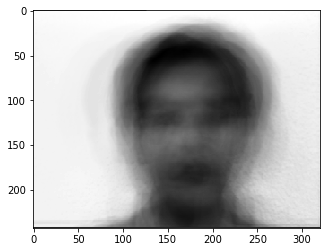

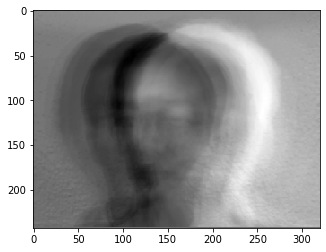

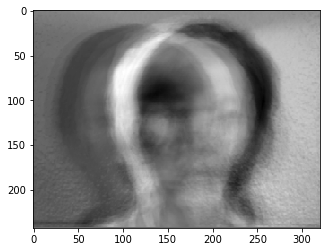

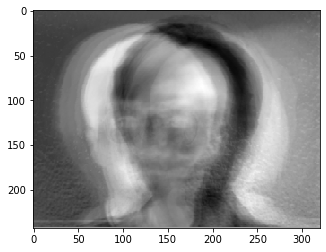

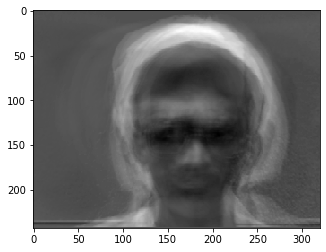

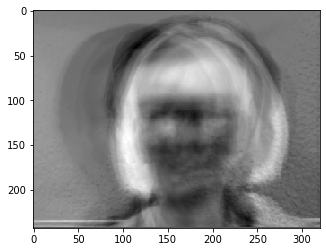

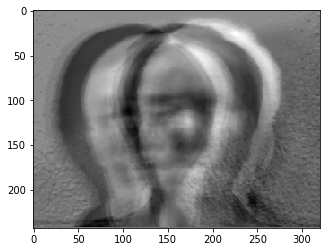

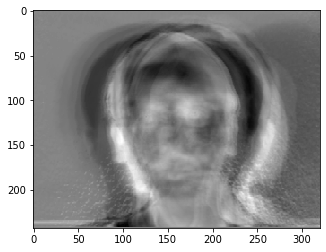

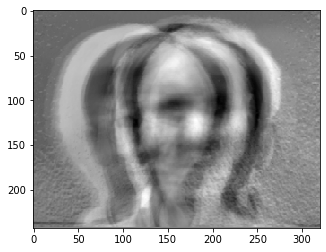

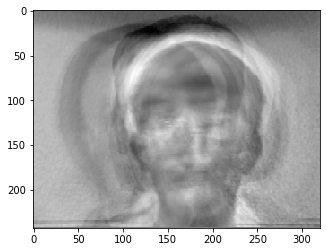

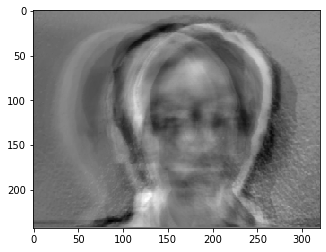

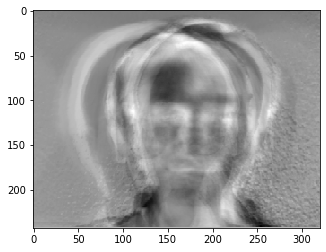

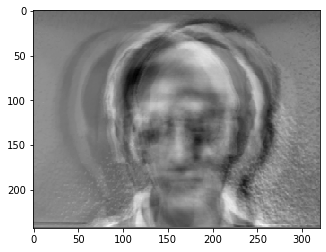

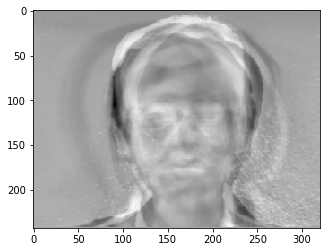

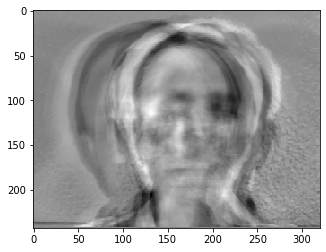

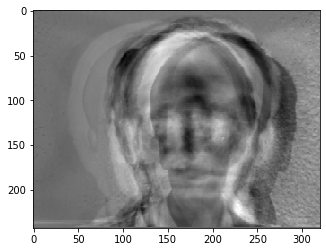

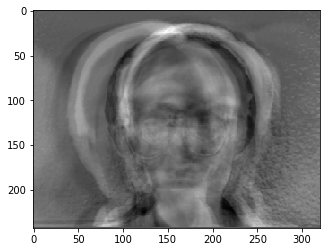

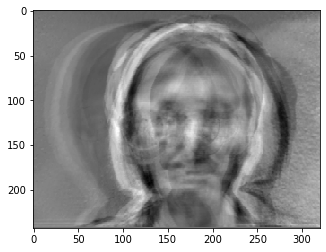

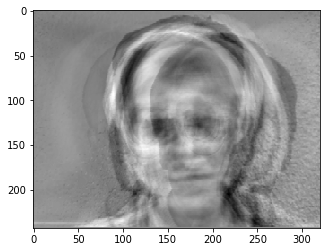

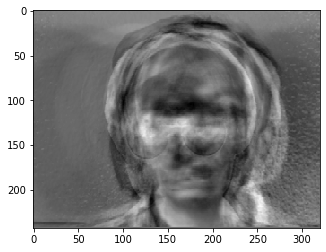

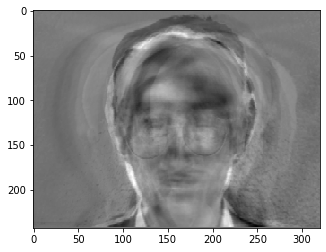

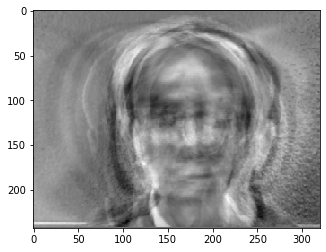

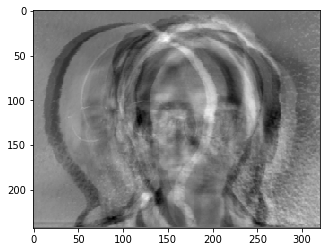

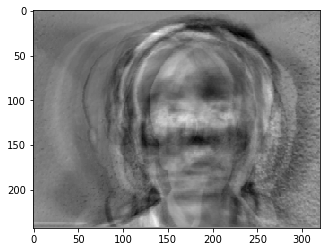

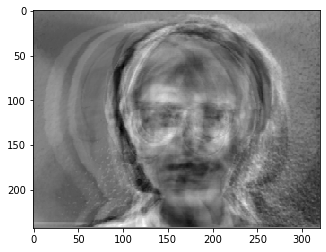

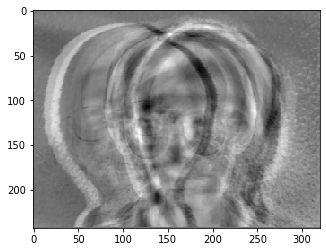

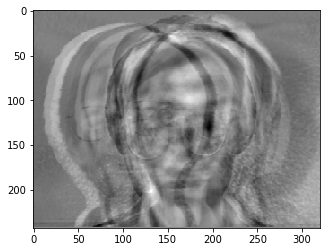

In [30]:
for i in range(27):
    comp_vec = principal_eig_vec[i]
    comp_img = comp_vec.reshape(243,320)
    comp_img = comp_img.astype(float)
    plt.imshow(comp_img,cmap="gray")
    plt.show()

#### **7. Draw the Scree Plot**

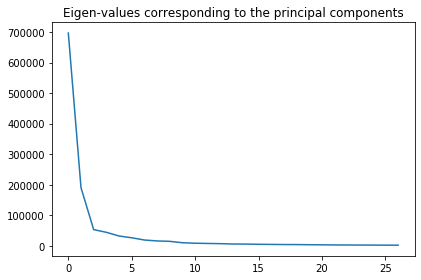

In [31]:
fig, ax = plt.subplots()

ax.plot(principal_eig_val)
ax.set_title("Eigen-values corresponding to the principal components")

plt.tight_layout()

#### **8. Obtain the feature vectors**

In [41]:
test_files = os.listdir(test_folder_path)
feat_vec_ls = []
for file in test_files:
    img_file = os.path.join(test_folder_path,file)
    test_img = mpimg.imread(img_file)
    test_img = test_img.reshape(arr.shape[0]*arr.shape[1],1)
    test_img = test_img - mean_img.T
    feat_vec = np.linalg.pinv(Q_hat).T@test_img
    feat_vec_ls.append(np.ravel(feat_vec))
#print(feat_vec_ls)

#### **9. Obtain the stem plot for the feature vectors**

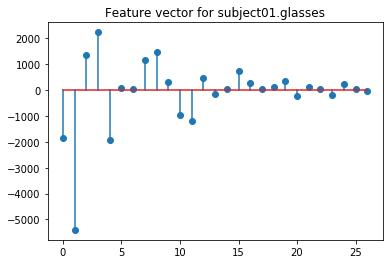

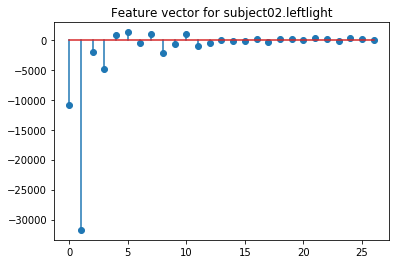

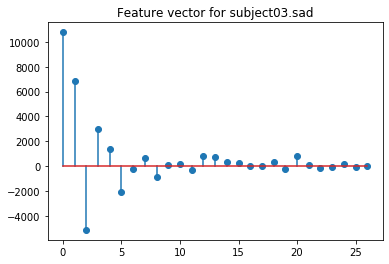

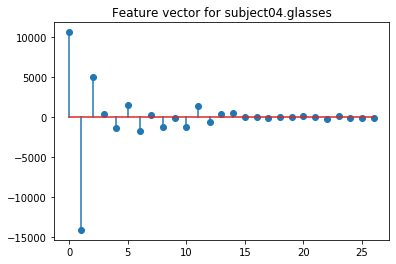

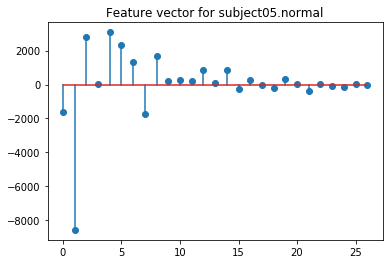

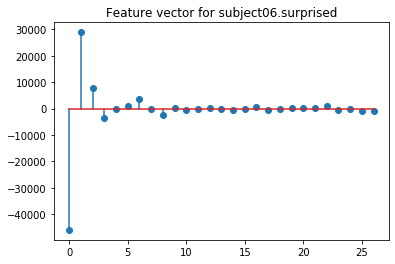

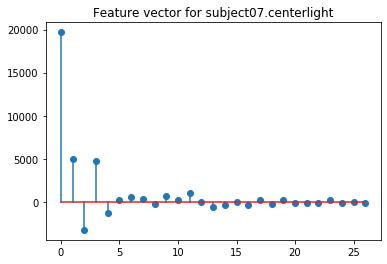

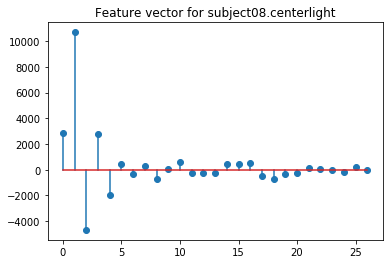

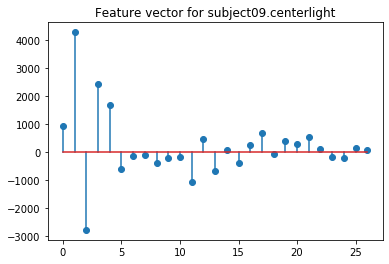

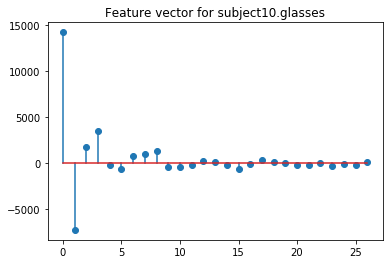

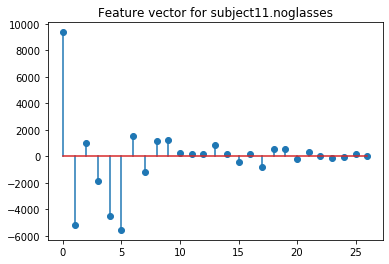

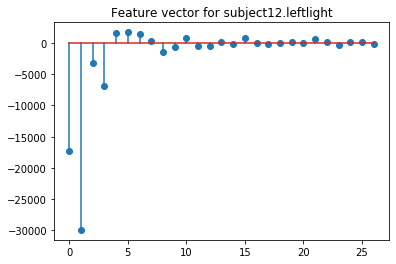

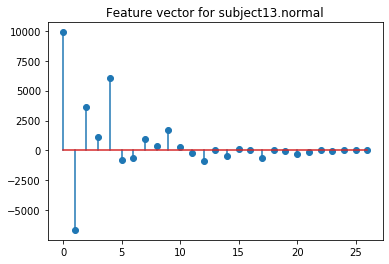

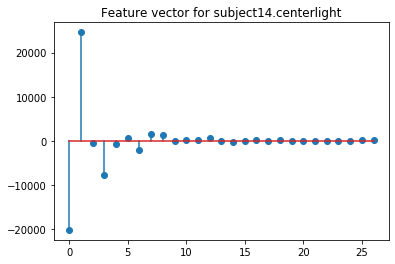

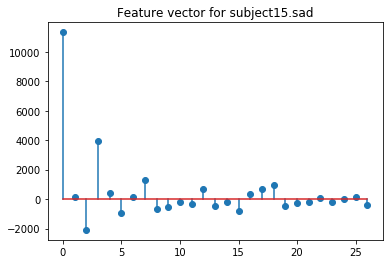

In [42]:
for i in range(len(feat_vec_ls)):
    plt.stem(feat_vec_ls[i])
    plt.title("Feature vector for "+test_files[i])
    plt.show()